The analysis - including functions below - are written by Shradha Ganapathy (with the exception of the word cloud function whose initial prompt was written by Chen Hui Wang and was later updated for analysis by Shradha Ganapathy.)

In [3]:
#The code below is to set stylistic elements of the page and does not materially add to analysis. 

In [41]:
from IPython.display import HTML

css_str = """
    <style>
        p {
            font-family: Menlo, Monaco, "Courier New", monospace;
            font-size: 18;
            line-height: 2
        }
    </style>
"""

HTML(css_str)


In [42]:
css_head = """
    <style>
        h1 {
            font-family: Menlo, Monaco, "Courier New", monospace;
            font-size: 35em;
        }
    </style>
"""
HTML(css_head)

In [43]:
css_ol = """
    <style>
        ol {
            font-family: Menlo, Monaco, "Courier New", monospace;
            font-size: 18;
        }
    </style>
"""
HTML(css_ol)

In [44]:
%%html
<style type='text/css'>
.CodeMirror{
font-size: 14px;
font-style: mono;
</style>

<hr>

<center><h1 style="color:#D98880;">LIE-<span style="color:#2A2524;">BRARY</span></h1> <br>

<h2> <i> "Bringing clarity to the chaos of online information" </i> </h2> 

</center>


<center> <p style = "font-size: 25"> <b> <i> Lie-brary was a project born from a conversation. </i> </b> </p> </center> <br>

 <p class = custom>

At a presentation on <i> The Safety, Accountability, Fairness and Equity-Today Act </i> -- colloquially known as the SAFE-T Act -- we were informed about prevailing  misconceptions being disseminated via social media on the act. The NGO hosting this event was naturally concerned about misinformation impeding the safe passage of one of the most talked about criminal justice reform acts to come of the state. The myths circulated also raised public fears of heightened dangers / "criminality" and induced panic. <br>

Whilst ruminating on this topic, we wondered if there was an objective way to understand, display and then potentially myth-bust on this issue. From this thought emerged Lie-brary. <br> </p>
    
<ol class = custom>

The goal of our project is three-fold:<br>
1. To capture the precise nature of this problem through analysis of data scraped from social media sites. This includes understanding the amount of misinformation, the sentiment of the content, the association between sentiment and misinformation, the nature of the content, and more. <br>
    
2. To present this information via a dashboard for easy comprehension. This would allow a broader audience to consume our insights. <br>
    
3. To provide accessible myth-busting messaging by leveraging CHATGPT (GPT3 API) to make it easier for NGOs to address their concerns at ~0 cost to their exchequer.<br>

</ol>


 <h2 style = "color: #ADD8E6;"> <b> STEP 1: DATA SCRAPING </b> </h2> <br>

Our first step was to scrape data from social media sites, Twitter and Reddit, via their APIs. We attempted to scrape data from Meta but found that access to developers was extremely limited and largely restricted to Ads Library information -- which would mean that our data would not be balanced with other sources (inorganic Ads versus organic content from Reddit or Twitter). We already had access to a Twitter API key and found Reddit highly accessible which tipped the scales in favor of these platforms.


To ensure parallelism of our data, we also discounted YouTube or TikTok. This is because we pulled text/post information from Twitter and Reddit; the difference in entity types (videos/short reels) would corrupt our analysis as it would mean that our sample groups were unbalanced.

Note that the following impositions applied to scraping from these platforms:
1. Twitter: the search index had a 7 day limit and pulled data only for the preceding week
2. Reddit: limited pulls to 200 posts while using requests + difficulting in filtering  specific keywords


 <h2 style = "color: #ADD8E6;"> <b> STEP 2: DATA LABELING </b> </h2> <br>


The data, thus collected, was subsequently manually labeled for misinformation and context (whether it was newsy, not relevant, etc). This was needed to build our static source of truth, to provide objective baseline accuracy metrics and for our analysis. 

Information on the categories/fields of the data we pulled as well as the labels we assigned to the data can be found in our data dictionary [insert link here]

<h2 style = "color: #ADD8E6;"> <b> STEP 3: DATA ANALYSIS </b> </h2> <br>

In this step -- the results of which are presented in this notebook -- we ran analysis to understand the precise nature of the concern. We first approached with a model/hypothesis, and then ran our analysis to verify against our null hypothesis.

Our sample size consisted of 300 posts from Reddit and 306 from Twitter. The limited sample size can be traced back to restrictions imposed by platforms while scraping data. As such, we would caveat that our findings apply to our highly limited sample and may not be directly / causally translated to the broader population of over billions of posts, videos, etc on these sites. However, we hope this is a good starting point to understand the problem.

In [45]:
#Importing data from a consolidated CSV
import pandas as pd
df = pd.read_csv("manual_labeled.csv", usecols=["user.id_str","text","compound","misinfo","context","source"])
df["misinfo"] = pd.to_numeric(df["misinfo"], errors='coerce')
df["compound"] = pd.to_numeric(df["compound"], errors='coerce')
df["text"] = df["text"].astype(str)
df["user.id_str"] = df["user.id_str"].astype(str)
df["source"] = df["source"].astype(str)
df["context"] = df["context"].astype(str)

<center> <h3 style = "color:#D9CED9;"> UNDERSTANDING TRENDS </h3> </center>

***
<b> NULL HYPOTHESIS 1: </b> "There is a preponderance of misinformation on social media on the SAFE-T act (>50% of misinformation)"
***

In [46]:
def percent_misinfo(df, source):
    filtered = df[df['source'] == source]
    sum_y = filtered["misinfo"].sum()
    percentage = (sum_y / len(filtered)) * 100
    print(f"{sum_y} is the total number of objects that have been designated as misinformation")
    return percentage

In [47]:
#Obtaining the percentage of misinformation from our sample on Reddit
misr = percent_misinfo(df, "reddit")
print(f"The percentage of misinformation in our sample is: {misr}, %")

7 is the total number of objects that have been designated as misinformation
The percentage of misinformation in our sample is: 2.3333333333333335, %


In [48]:
#Obtaining the percentage of misinformation from our sample on Twitter
mist = percent_misinfo(df, "twitter")
print(f"The percentage of misinformation in our sample is: {mist}, %")

13 is the total number of objects that have been designated as misinformation
The percentage of misinformation in our sample is: 4.248366013071895, %


<b> CONCLUSION: </b> Our analysis suggests that the percentage of misinformation on social media platforms is low and appears to be higher on Twitter than on Reddit. However, it is important to note that our sample was limited - and that a reduced presence (versus the overall) does not necessarily mean limited reach or engagement, which could still pose a concern to both users and the platform.

***
<b>NULL HYPOTHESIS 2: </b> "More than 50% conversation with the keywords 'purge law' / 'pretrial fairness act' / 'safe-t' act is related to the law making for an active discussion"
***

In [49]:
#Importing Reddit data from a CSV specific to breakdown analysis
import pandas as pd
df_r = pd.read_csv("safe-t_300posts_add_url.csv", usecols=["subreddit","title", "selftext","decision","context"])
df_r["decision"] = pd.to_numeric(df_r["decision"], errors='coerce')
df_r["context"] = df_r["context"].astype(str)
df_r["title"] = df_r["title"].astype(str)
df["source"] = df["source"].astype(str)
df_r["selftext"] = df_r["selftext"].astype(str)

In [50]:
#Importing Twitter data from a CSV specifically for breakdown analysis
df_t = pd.read_csv("tweets_safe-t.csv", usecols=["text","user.id_str","decision","context","user.screen_name"])
df_t["decision"] = pd.to_numeric(df_t["decision"], errors='coerce')
df_t["text"] = df_t["text"].astype(str)
df_t["user.id_str"] = df_t["user.id_str"].astype(str)
df_t["user.screen_name"] = df_t["user.screen_name"].astype(str)
df["source"] = df["source"].astype(str)
df_t["context"] = df_t["context"].astype(str)

In [51]:
import re

def breakdown(df, reg):
    reg = reg
    regex = re.compile(reg)
    #filtered = df[df['source'] == source]
    count = 0

    for row in df["context"]:
        match = regex.search(row)
        if match:
            count += 1
    total_rows = len(df)
    percent = (count / total_rows) * 100
    return percent


In [52]:
#Percentage of content associated with the Act in our Reddit sample:
reg_relevance =  r"((N|n)ot|(i|I)?r)\s?relevant"
red_rel = breakdown(df_r, reg_relevance)
print (red_rel, "% of content is not relevant to the Act")

49.666666666666664 % of content is not relevant to the Act


In [53]:
#Percentage of content associated with the Act in our Twitter sample:
twit_rel = breakdown(df_t, reg_relevance)
print (twit_rel, "% of content is not relevant to the Act")

49.01960784313725 % of content is not relevant to the Act


<b> CONCLUSION </b>: we find that ~50% of content on Twitter or Reddit is a discussion on the Act (is relevant).

***
Let us break down our content by type to better understand it:
***

In [54]:
#Regexes for breakdowns:
reg_news = r"news"
reg_op_pos = r"opinion positive"
reg_op_neg = r"negative"
reg_disc = r"discussion of"
reg_sat = r"satire"
reg_event = r"event"

In [55]:
#On Twitter
twit_news = breakdown(df_t, reg_news)
twit_op_pos = breakdown(df_t, reg_op_pos)
twit_op_neg = breakdown(df_t, reg_op_neg)
twit_disc = breakdown(df_t, reg_disc)
twit_sat = breakdown(df_t, reg_sat)
twit_event = breakdown(df_t, reg_event)

print(twit_news, "% of content in our Twitter sample is news-related")
print(twit_op_pos, "% of content in our Twitter sample expresses a positive opinion")
print(twit_op_pos, "% of content in our Twitter sample expresses a negative opinion")
print(twit_disc, "% of content in our Twitter sample is a discussion on the SAFE-T Act")
print(twit_sat, "% of content in our Twitter sample is satirical")
print(twit_event, "% of content in our Twitter sample are links to events")

6.209150326797386 % of content in our Twitter sample is news-related
10.130718954248366 % of content in our Twitter sample expresses a positive opinion
10.130718954248366 % of content in our Twitter sample expresses a negative opinion
13.071895424836603 % of content in our Twitter sample is a discussion on the SAFE-T Act
0.6535947712418301 % of content in our Twitter sample is satirical
3.9215686274509802 % of content in our Twitter sample are links to events


In [56]:
#On Reddit
red_news = breakdown(df_r, reg_news)
red_op_pos = breakdown(df_r, reg_op_pos)
red_op_neg = breakdown(df_r, reg_op_neg)
red_disc = breakdown(df_r, reg_disc)
red_sat = breakdown(df, reg_sat)
red_event = breakdown(df, reg_event)
print(red_news, "% of content in our Reddit sample is news-related")
print(red_op_pos, "% of content in our Reddit sample expresses a positive opinion")
print(red_op_neg, "% of content in our Reddit sample expresses a negative opinion")
print(red_disc, "% of content in our Reddit sample is a discussion on the SAFE-T Act")
print(red_sat, "% of content in our Twitter sample is satirical")
print(red_event, "% of content in our Twitter sample are links to events")

29.666666666666668 % of content in our Reddit sample is news-related
1.0 % of content in our Reddit sample expresses a positive opinion
9.666666666666666 % of content in our Reddit sample expresses a negative opinion
1.3333333333333335 % of content in our Reddit sample is a discussion on the SAFE-T Act
0.0 % of content in our Twitter sample is satirical
0.0 % of content in our Twitter sample are links to events


Let us visualize the categorization of our content:

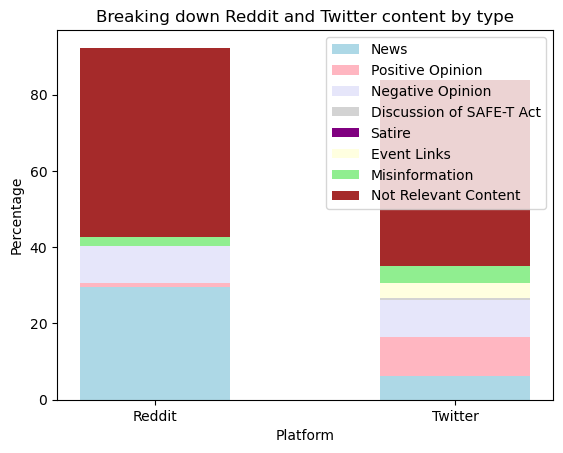

In [57]:
import matplotlib.pyplot as plt

x = ['Reddit']

y1 = red_news
y2 = red_op_pos
y3 = red_op_neg
y4 = red_disc
y5 = red_sat
y6 = red_event
y7 = misr
y8 = red_rel

plt.bar(x, y1, color='lightblue',width = 0.5)
plt.bar(x, y2, bottom=y1, color='lightpink', width = 0.5)
plt.bar(x, y3, bottom=y1+y2, color='lavender', width = 0.5)
plt.bar(x, y4, bottom=y1+y2+y3, color='lightgrey', width = 0.5)
plt.bar(x, y5, bottom=y1+y2+y3+y4, color='purple', width = 0.5)
plt.bar(x, y6, bottom=y1+y2+y3+y5, color='lightyellow', width = 0.5)
plt.bar(x, y7, bottom=y1+y2+y3+y5+y6, color='lightgreen', width = 0.5)
plt.bar(x, y8, bottom=y1+y2+y3+y5+y6+y7, color='brown', width = 0.5)

x1 = ['Twitter']


y11 = twit_news
y12 = twit_op_pos
y13 = twit_op_neg
y14 = twit_disc
y15 = twit_sat
y16 = twit_event
y17 = mist
y18 = twit_rel

plt.bar(x1, y11, color='lightblue',width = 0.5)
plt.bar(x1, y12, bottom=y11, color='lightpink', width = 0.5)
plt.bar(x1, y13, bottom=y11+y12, color='lavender', width = 0.5)
plt.bar(x1, y14, bottom=y11+y12+y13, color='lightgrey', width = 0.5)
plt.bar(x1, y15, bottom=y11+y12+y13+y14, color='purple', width = 0.5)
plt.bar(x1, y16, bottom=y11+y12+y13+y15, color='lightyellow', width = 0.5)
plt.bar(x1, y17, bottom=y11+y12+y13+y15+y16, color='lightgreen', width = 0.5)
plt.bar(x1, y18, bottom=y11+y12+y13+y15+y16+y17, color='brown', width = 0.5)



plt.xlabel("Platform")
plt.ylabel("Percentage")
plt.legend(["News", "Positive Opinion", "Negative Opinion", "Discussion of SAFE-T Act","Satire","Event Links","Misinformation",
           "Not Relevant Content"])
plt.title("Breaking down Reddit and Twitter content by type")
plt.show()

 It is difficult for a social media platform to evaluate content that is not natively hosted on the site itself (for instance, if it presented in the form of external URLs shared by users). Understanding if the conversation is native to the platform or if it involves looking externally is essential to delineate responsibilities.

***
<b> EXPLORATORY QUESTION: </b> how much of our Reddit and Twitter samples contain external URLs/links?
***

In [58]:
reg_urls = r"^(?!.*(redd.?it|twitter)).*([a-z]{2,8}:\/\/)"

def urls_breakdown(df, reg, source):
    regex = re.compile(reg)
    filtered = df[df['source'] == source]
    count = 0

    for row in filtered["text"]:
        match = regex.search(row)
        if match:
            count += 1
    total_rows = len(filtered)
    percent = (count / total_rows) * 100
    return percent

#On Reddit
print(urls_breakdown(df, reg_urls, "reddit"), "% of content in our Reddit sample contains external URLs")

#On Twitter
print(urls_breakdown(df, reg_urls, "twitter"), "% of content in our Twitter sample contains external URLs")

3.0 % of content in our Reddit sample contains external URLs
68.95424836601308 % of content in our Twitter sample contains external URLs


<b> CONCLUSION: </b> we find that, on average, Twitter's sample has a higher proportion of external URLs versus Reddit's sample.

<center> <h3 style = "color:#ff8fab;"> UNDERSTANDING SENTIMENT </h3> </center>

By leveraging NLTK's SentimentIntensityAnalyzer, we generated average sentiment scores for all content in our static dataset (that was manually labeled). We attempted to utilize GPT3's API; however, this failed due to the costs attached to purchasing GPT3 tokens.  scores range from -1 to 1 and fall into 3 camps:
<ol>
    <li> positive sentiment: [0.34,1] </li>
    <li> neutral sentiment: (-0.34,0.34)</li>
    <li> negative sentiment: [-1,-0.34] </li>
</ol>


***
<b> EXPLORATORY QUESTION: </b> what was the distribution of sentiment scores in our given sample?
***

In [59]:
#Frequency distribution of sentiment
import plotly.express as px
import plotly.graph_objs as go
fig = px.histogram(df, x='compound')
fig.show()

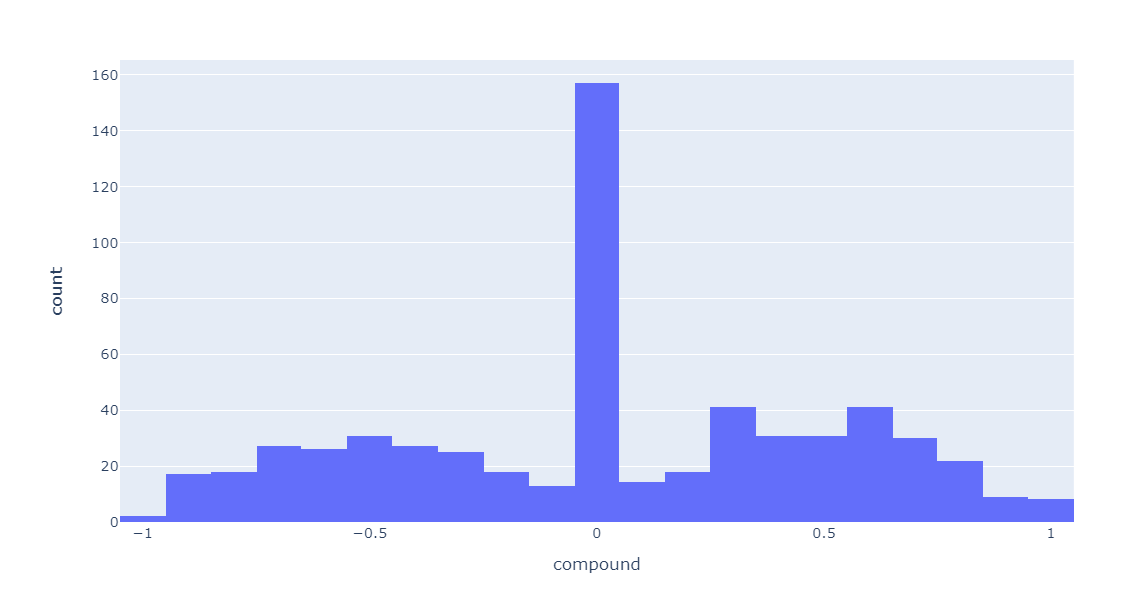

***
<b> NULL HYPOTHESIS: </b> most misinformation is correlated with negative sentiment.

To test this: we will perform an OLS regression of sentiment versus misinformation. 

***

In [60]:
import statsmodels.api as sm
X = df["compound"]
Y = df["misinfo"]
X = sm.add_constant(X)
reg = sm.OLS(Y, X, missing = 'drop')
output = reg.fit()
print(output.summary())

                            OLS Regression Results                            
Dep. Variable:                misinfo   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.634
Date:                Mon, 06 Mar 2023   Prob (F-statistic):              0.202
Time:                        14:56:09   Log-Likelihood:                 184.69
No. Observations:                 606   AIC:                            -365.4
Df Residuals:                     604   BIC:                            -356.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0336      0.007      4.620      0.0

<b> CONCLUSION </b>: 
    
    "Ceteris paribus, content adjuged as misinformation has an expected sentiment score of -0.0193 units"

Visualizing our regression and our regression line in a graph:

In [61]:
import plotly.express as px
import plotly.graph_objs as go
fig = px.scatter(x=df["compound"], y=df["misinfo"])
range_x = [X['compound'].min(), X['compound'].max()]
range_y = [output.params[0] + output.params[1]*range_x[0], output.params[0] + output.params[1]*range_x[1]]
fig.add_trace(go.Scatter(x=range_x, y=range_y, mode='lines', name='Regression Line'))
fig.show()

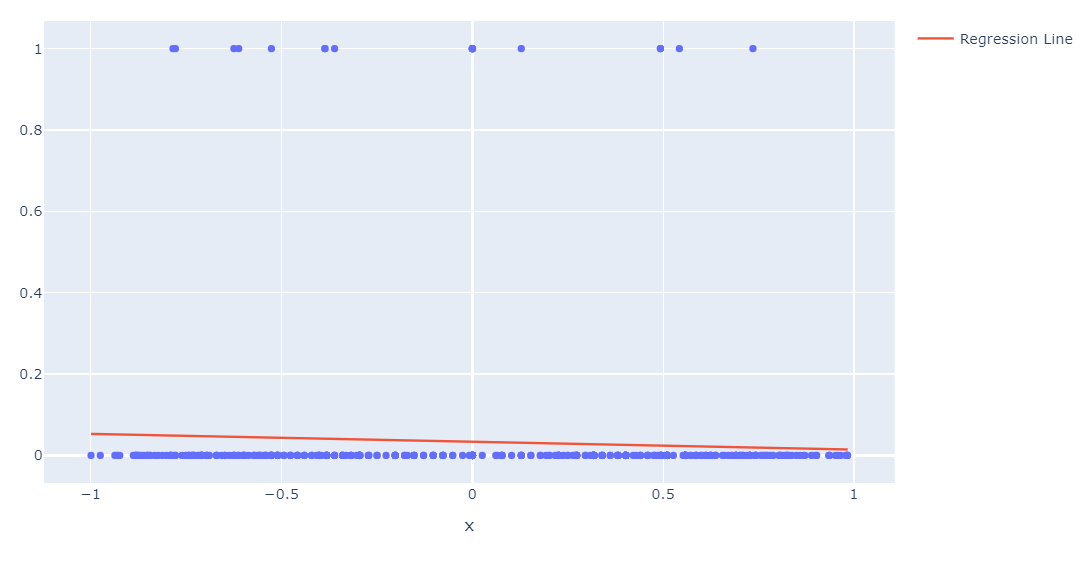

<hr>

<center> <h3 style = "color:#FFC0B3C7;"> UNDERSTANDING USERS </h3> </center>

***
<b> EXPLORATORY QUESTION: </b> is our content being propagated by 'superusers' -- these are individual users who generate higher proportions of the content accessible to others on the platform
***

Please note that the user IDs displayed in the analysis below are provided on the backend - they do not match a user's public facing profile.
We have chosen not to display user names to respect privacy considerations, but all profiles listed below are public.

In [62]:
#counting super users
def superusers(df, source):
    filtered = df[df['source'] == source]
    occur = filtered.groupby('user.id_str').size().reset_index(name='values')
    occur = occur[occur['values'] > 3].sort_values('values', ascending=False)
    display(occur.reset_index(drop=True))
    return occur

TOP 30 REDDIT SUPERUSERS

In [63]:
group_data_red = superusers(df,"reddit")

,user.id_str,values
0,t2_12elra,48
1,t2_12gbdz,46
2,t2_abkwcdw9,9
3,t2_im6rk,9
4,t2_jocnl,7
5,t2_1vykufk4,6
6,t2_7v9kytja,6
7,t2_1u1g5alb,5
8,t2_3wyqjcu5,5
9,t2_di2cqf67,4


In [64]:
import plotly.express as px

fig = px.bar(group_data_red, x='values', y='user.id_str', orientation='h', 
             title='Top Reddit User IDs Posting on the SAFE-T Act',barmode = 'group',
             color_discrete_sequence=['#957DAD', "#FFDFD3" ])
fig.update_yaxes(title_text='User IDs')
fig.update_layout(
    plot_bgcolor='white')
fig.show()

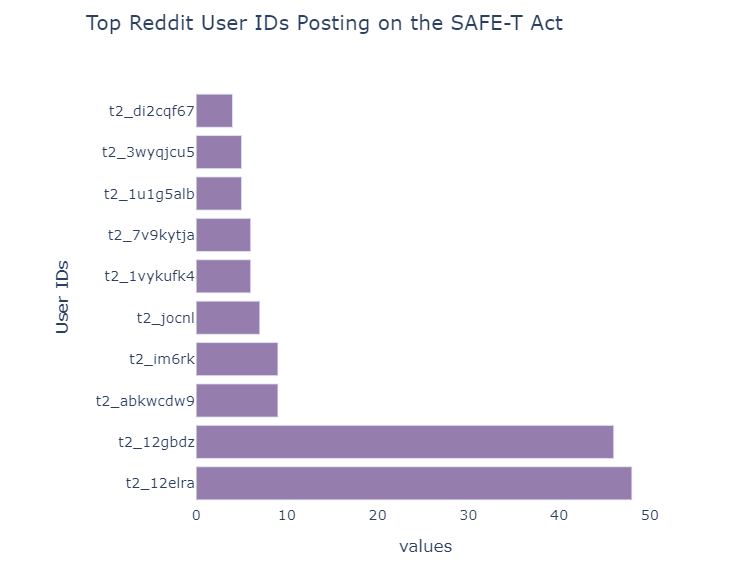

TOP 30 TWITTER SUPERUSERS

In [65]:
group_data_twit = superusers(df,"twitter")

,user.id_str,values
0,1.07978E+18,27
1,1.50255E+18,10
2,7.68158E+17,7
3,1.57589E+18,6
4,1.11344E+18,5
5,4379787136,4


In [66]:
fig = px.bar(group_data_twit, x='values', y='user.id_str', orientation='h', 
             title='Top Twitter User IDs Posting on the SAFE-T Act',barmode = 'group',
             color_discrete_sequence=["#FFDFD3"])
fig.update_yaxes(title_text='User IDs')
fig.update_layout(
    plot_bgcolor='white')
fig.show()

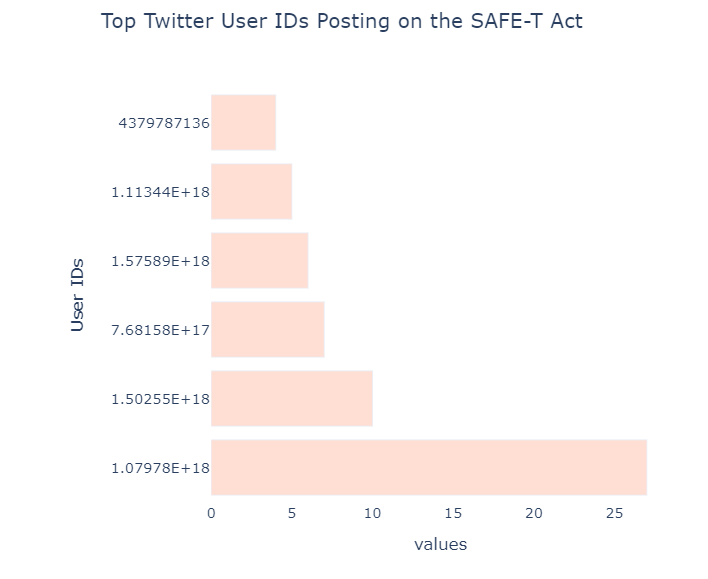

<b> CONCLUSION: </b> we find that our Reddit sample's superusers, on average, tend to generate greater amounts of content than our Twitter sample's superusers do. We have identified our samples' top 30 superusers above.

<hr>

<center> <h3 style = "color:#F8C8DC;"> UNDERSTANDING THE TEXT </h3> </center>

In [69]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud, STOPWORDS

stopwords = STOPWORDS
additional = ['https','html']
stopwords.update(additional)

def ngrams(df, source, start, end):
    filtered = df[df['source'] == source]
    #for filtered['context'] != reg_relevance
    text = filtered['text']
    vectorize = CountVectorizer(ngram_range = (start, end), max_features = 30, stop_words=stopwords).fit(text)
    words = vectorize.transform(text)
    sum_n = words.sum(axis = 0)
    freq = [(w, sum_n[0, i]) for w, i in vectorize.vocabulary_.items()]
    freq = sorted(freq, key = lambda x: x[1], reverse = True)
    
    return freq

In [76]:
 import warnings  
warnings.filterwarnings("ignore")
#this was done to ignore warnings about stopwords such as 'the' / 'in' etc being excluded - which is intended behavior for
#our n-grams function

***
<b> EXPLORATORY QUESTION:</b> what are the top 30 bi-grams associated with our Reddit sample's text
***

In [71]:

bi = ngrams(df, "reddit",2,2)
bigrams = pd.DataFrame(bi)
bigrams.columns = ["Reddit Bigrams","Frequency of Occurrence"]
print(bigrams)

      Reddit Bigrams  Frequency of Occurrence
0           safe act                      119
1          sales tax                       38
2           fair tax                       37
3          cash bail                       37
4       fairness act                       36
5      supreme court                       35
6            tax act                       31
7   illinois supreme                       25
8      finance yahoo                       24
9   pregnant workers                       20
10       court halts                       19
11    bail provision                       19
12        yahoo news                       18
13         news safe                       18
14  workers fairness                       17
15  member districts                       15
16  elimination cash                       15
17       judge rules                       15
18        safe group                       15
19       chicago sun                       14
20         sun times              

***
<b> EXPLORATORY QUESTION:</b> what are the top 30 tri-grams associated with our Reddit sample's text
***

In [72]:
tri = ngrams(df, "reddit",3,3)
trigrams = pd.DataFrame(tri)
trigrams.columns = ["Reddit Trigrams","Frequency of Occurrence"]
print(trigrams)

              Reddit Trigrams  Frequency of Occurrence
0                fair tax act                       31
1      illinois supreme court                       25
2         supreme court halts                       19
3          finance yahoo news                       18
4             yahoo news safe                       18
5   pregnant workers fairness                       17
6        workers fairness act                       17
7       elimination cash bail                       15
8           chicago sun times                       14
9          national sales tax                       13
10       fair labor standards                       13
11        cash bail provision                       13
12     multi member districts                       12
13        labor standards act                       12
14            news safe group                       12
15          congress gov bill                       10
16        bail provision safe                       10
17        

***
<b> EXPLORATORY QUESTION:</b> what are the top 30 bi-grams associated with our Twitter sample's text
***

In [73]:
bi = ngrams(df, "twitter",2,2)
bigrams = pd.DataFrame(bi)
bigrams.columns = ["Twitter Bigrams","Frequency of Occurrence"]
print(bigrams)

         Twitter Bigrams  Frequency of Occurrence
0               safe act                       53
1      pretrial fairness                       36
2           fairness act                       36
3       support pretrial                       25
4              purge law                       23
5         signed support                       22
6        law enforcement                       19
7          supreme court                       12
8                law amp                       11
9              vow purge                       10
10             amp order                       10
11       social security                       10
12      anyone surprised                        9
13         surprised vow                        9
14       vow retribution                        9
15       retribution vow                        9
16             order vow                        9
17               vow end                        9
18            end social                        9


***
<b> EXPLORATORY QUESTION:</b> what are the top 30 tri-grams associated with our Twitter sample's text
***

In [74]:
tri = ngrams(df, "twitter",3,3)
trigrams = pd.DataFrame(tri)
trigrams.columns = ["Twitter Trigrams","Frequency of Occurrence"]
print(trigrams)

                Twitter Trigrams  Frequency of Occurrence
0          pretrial fairness act                       36
1      support pretrial fairness                       24
2        signed support pretrial                       21
3                  law amp order                       10
4           anyone surprised vow                        9
5      surprised vow retribution                        9
6            vow retribution vow                        9
7          retribution vow purge                        9
8                  vow purge law                        9
9                  purge law amp                        9
10                 amp order vow                        9
11                 order vow end                        9
12                vow end social                        9
13           end social security                        9
14  organizations signed support                        9
15     illinois attorney general                        8
16      saftey

***
<b> Visualizing a tag cloud of the most used words in content identified as misinformation </b>
***

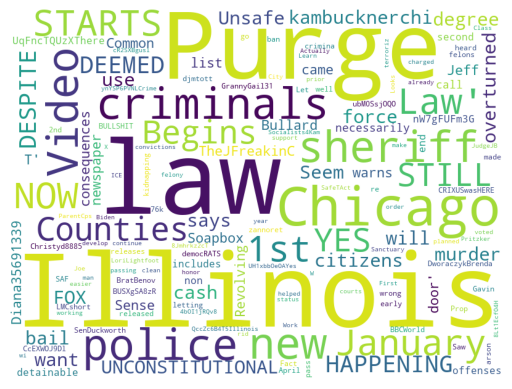

In [75]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import sys, os
os.chdir(sys.path[0])

stopwords = STOPWORDS
safe_T = ['SAFE', 'T', 'Act','https','co','s']
stopwords.update(safe_T)

def word_cloud(df):
    '''
    Base code from: Chen Hui (Fei) Wang
    Updated for analysis by: Shradha Ganapathy
    '''
    wc = WordCloud(
        background_color = 'white',
        stopwords = stopwords,
        height = 600,
        width = 800)
    
    misstr = ''
    for title in df[df['misinfo'] == 1]['text']:
        misstr += title   

    wc.generate(misstr)
    plt.imshow(wc)
    plt.axis('off')
    plt.show()
    
word_cloud(df)

***
<b> Building individual word clouds of the most used words for content marked as having 1) negative 2) positive and 3) neutral sentiments respectively </b>
***

In [37]:
def word_cloud_sent(df):
    '''
    Initial code from: Chen Hui (Fei) Wang
    Completed for analysis by: Shradha Ganapathy
    '''
    wc = WordCloud(
        background_color = 'white',
        stopwords = stopwords,
        height = 600,
        width = 800)
    
    neg_str = ''
    for title in df[df['compound'] <0]['text']:
        neg_str += title
    wc.generate(neg_str)
    plt.imshow(wc)
    plt.axis('off')
    print("Here is a tag cloud for content with negative sentiment")
    plt.show()
    
    
    pos_str =''
    for title in df[df['compound'] > 0 ]['text']:
        pos_str += title
    wc.generate(pos_str)
    plt.imshow(wc)
    plt.axis('off')
    print("Here is a tag cloud for content with positive sentiment")
    plt.show()
    
    neu_str = ''
    for title in df[df['compound'] == 0]['text']:
        neu_str += title    
    wc.generate(neu_str)
    plt.imshow(wc)
    plt.axis('off')
    print("Here is a word cloud for content with neutral sentiment")
    plt.show()


Here is a tag cloud for content with negative sentiment


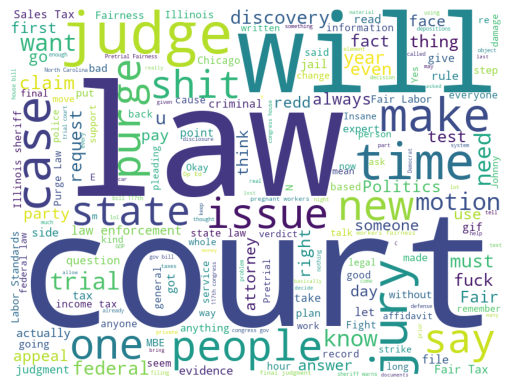

Here is a tag cloud for content with positive sentiment


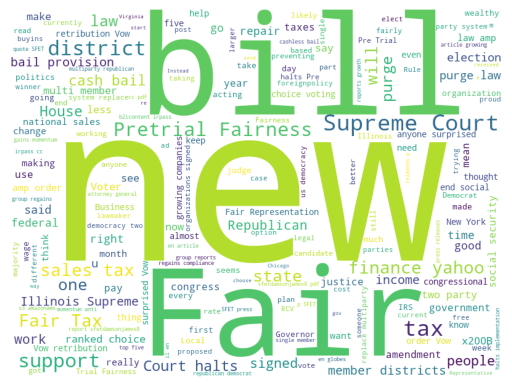

Here is a word cloud for content with neutral sentiment


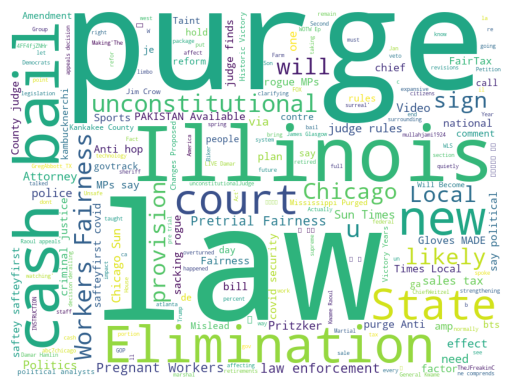

In [38]:
word_cloud_sent(df)

Our analysis above has attempted to - with a limited sample - deep dive into the nature of misinformation on the platform, the type of content attached with specific keywords or sentiments, the prolific nature of users and urls related to this content, and more. We have also created visual representations of our results for ease of understanding.

<h2 style = "color: #ADD8E6;"> <b> STEP 4: BUILDING A CLASSIFIER </b> </h2> <br>

We built a multi-class text machine-learning model with Scikit-Learn - trained on our manually labeled data - to automatically classify content as either misinformation or not. 

What we realized is the absolute importance of relevance and accuracy when training the model. Lack of access to funds, labeling resources, and time served as a limiter for the accuracy of our model. This is reflected by the millions of dollars of resources allocated to labeling operations across the globe by tech companies such as Meta and Google.

Our classifier thus tended to predict any text as 'not misinformation' likely due to limited misinformation samples from Reddit and Twitter

<h2 style = "color: #ADD8E6;"> <b> STEP 5: DATA VISUALIZATION </b> </h2> <br>

The previous 3 steps are consolidated in the form of an interactive dashboard, built via Dash, where you can view content via filters, provide feedback, interact with a 'mythbusting messaging' segment and more!


We leveraged GPT3's API (turbo) to build a myth-busting messaging component to our dashboard. Understanding how resource-strapped NGOs and other not-for-profit organizations may be -- and thus unable to hire PR agencies etc to write out extensive templates to counteract misinformation -- GPT3 would be a good intermediate substitute.

<center> <h2 style = "color: #D4295E;">  <b> KEY TAKEAWAYS </b> </h2> </center>  <br>

1. The importance of building a comprehensive framework / schema for a project -- especially when working across responsibilities and team members
2. How to connect individual, local work with the broader picture
3. The difficulty attached to building out a product from scratch (especially models)
4. While we assume that certain issues are widespread, the reality is that they may not be as commonly accessible as previously assumed. However, this does not negate the impact of misinformation or the need to build messaging to counteract its influences on populations that may be likely to believe in what's promoted. This also does not take into account amplification (through interactions or engagement) even among the smaller population exposed to it.
5. The broader shift of misinformation from being propagated in public spaces to more private entity types (groups, messaging platforms such as Whatsapp, Messenger). 